In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["target"])['target']
X, y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

In [3]:
def preprocess(df):
    df = df.copy(deep=True)
    return pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)

X = preprocess(X)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


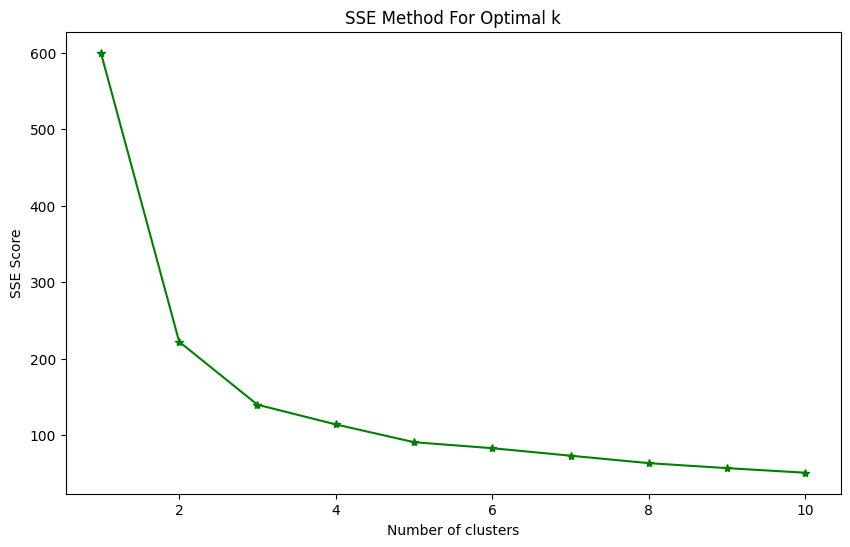

In [4]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(points)
    sse.append(kmeans.inertia_)
  return sse


plt.figure(figsize=(10,6))
plt.plot(range(1, 11), calculate_WSS(X, 10), 'g*-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE Score')
plt.title('SSE Method For Optimal k')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, n_init='auto').fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

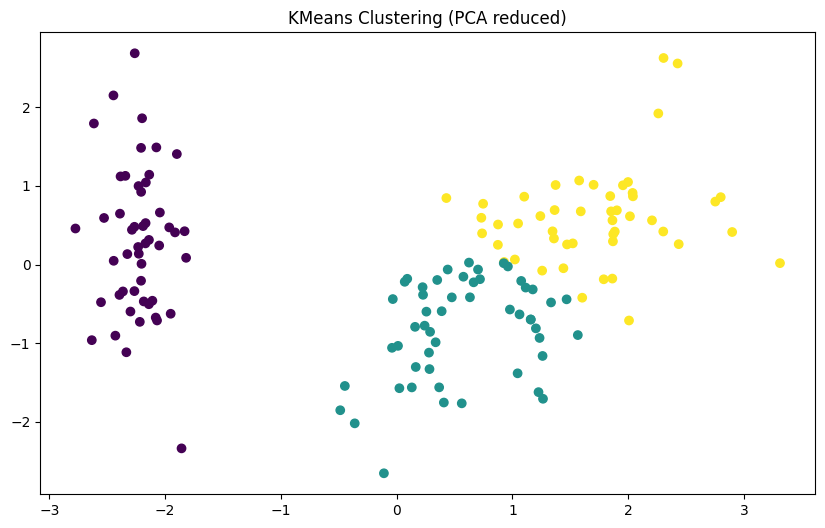

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_)

plt.title('KMeans Clustering (PCA reduced)')
plt.show()

In [7]:
# Internal measures
print("Silhouette_score: ", silhouette_score(X, kmeans.labels_))
print("Calinski_Harabasz_score", calinski_harabasz_score(X, kmeans.labels_))
print("Davies_Bouldin_score", davies_bouldin_score(X, kmeans.labels_))

# External measures
print("Adjusted_Rand_score", adjusted_rand_score(np.array(y), kmeans.labels_))
print("Normalized_Mutual_Info_score", normalized_mutual_info_score(np.array(y), kmeans.labels_))
print("Homogeneity_Completeness_V_Measure", homogeneity_completeness_v_measure(np.array(y), kmeans.labels_))

Silhouette_score:  0.45937792074496625
Calinski_Harabasz_score 241.89326236806843
Davies_Bouldin_score 0.8340001544731055
Adjusted_Rand_score 0.6100728505285608
Normalized_Mutual_Info_score 0.6525582020084985
Homogeneity_Completeness_V_Measure (0.6523997639897414, 0.6527167170006234, 0.6525582020084983)
